In [4]:
import arc
from arc import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import scipy
h = scipy.constants.h
epsilon_0 = scipy.constants.epsilon_0
a_0 = scipy.constants.physical_constants['Bohr radius']
e = scipy.constants.e

In [ ]:
Rb = arc.Rubidium()
Cs = arc.Caesium()

difs = np.arange(-7, 7)

min_n = 40
max_n = 90
ns = np.arange(min_n,max_n)
jps = [(1/2,1/2), (1/2,3/2), (3/2,1/2), (3/2,3/2)]

jp_deltas = []
preferQuantumDefects = True
# C3k coefficients
c3ks = []
w=1

num=1
for dif in difs:
    
    for jp in jps:    
    
        delta1 = []
        delta2 = []

        for n in ns:
            nb = n+dif
            # Rb lowering n
            defect_Rb = Rb.getEnergy(n-1, 1, jp[0], 1/2) - Rb.getEnergy(n, 0, 1/2, 1/2)
            defect_Cs = Cs.getEnergy(nb, 0, 1/2, 1/2) - Cs.getEnergy(nb, 1, jp[1], 1/2)
            defect = defect_Rb - defect_Cs
            delta1.append(defect*1.6e-19/h/1e9)

            # for Cs lowering n
            defect_Rb = Rb.getEnergy(n, 1, jp[0], 1/2) - Rb.getEnergy(n, 0, 1/2, 1/2)
            defect_Cs = Cs.getEnergy(nb, 0, 1/2, 1/2) - Cs.getEnergy(nb-1, 1, jp[1], 1/2)
            defect = defect_Rb - defect_Cs
            delta2.append(defect*1.6e-19/h/1e9)

        
        min_defect1 = min(np.array(delta1), key=abs)
        min_defect2 = min(np.array(delta2), key=abs)

        defects = min_defect1, min_defect2

        for d in defects:
            
            for i in [-1,0,1]:
                
                if d == min_defect1:
                    try:
                        assoc_n = ns[delta1.index(d) + i]
                        c = [assoc_n, 0, 1/2, assoc_n+dif, 0, 1/2, assoc_n-1, 1, jp[0], assoc_n+dif, 1, jp[1]]
                        defect = delta1[delta1.index(d)+i]
                
                    except IndexError:
                        continue
                    
                if d == min_defect2:
                    try:
                        assoc_n = ns[delta2.index(d) + i]
                        c = [assoc_n, 0, 1/2, assoc_n+dif, 0, 1/2, assoc_n, 1, jp[0], assoc_n+dif-1, 1, jp[1]]
                        defect = delta2[delta2.index(d)+i]
                
                    except IndexError:
                        continue
                    
                    
                rb_matrix_element_j = arc.Rubidium().getReducedMatrixElementJ(c[0], 0, .5, c[6], 1, jp[0])     
                cs_matrix_element_j = arc.Caesium().getReducedMatrixElementJ(c[3], 0, .5, c[9], 1, jp[1])
                
                c3k = (a_0[0]*e) **2 / h / (4*np.pi*epsilon_0) * 1e9 * cs_matrix_element_j * rb_matrix_element_j/np.sqrt(2*jp[0]+1)/np.sqrt(2*jp[1]+1)
                
                level_spacing= (Rb.getEnergy(assoc_n-1, 0, 1/2) - Rb.getEnergy(assoc_n, 0, 1/2))*1.6e-19/h/1e9

                if abs(defect) < .0005 * abs(level_spacing) and abs(c3k) > 1:
                    print(num)
                    num+=1
                    print(f'channel {jps.index(jp)+1} = |Rb {c[0]}s_1/2, Cs {c[3]}s_1/2> -> |Rb {c[6]}p_{c[8]}, Cs {c[9]}p_{c[11]}>')
                    print(f'min defect = {defect*1e3} MHz')
                    print(f'c3k = {c3k}')

TypeError: AlkaliAtom.getEnergy() got an unexpected keyword argument 'preferQuantumDefects'

In [65]:
min_defects = [min(np.array(jp_deltas[0]), key=abs), 
               min(np.array(jp_deltas[1]), key=abs), 
               min(np.array(jp_deltas[2]), key=abs), 
               min(np.array(jp_deltas[3]), key=abs)]
assoc_ns = [ns[jp_deltas[0].index(min_defects[0])],
            ns[jp_deltas[1].index(min_defects[1])],
            ns[jp_deltas[2].index(min_defects[2])],
            ns[jp_deltas[3].index(min_defects[3])]]
print(list(ns))



[np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(90), np.int64(91), np.int64(92), np.int64(93), np.int64(94), np.int64(95), np.int64(96), np.int64(97), np.int64(98), np.int64(99), np.int64(100), np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106), np.int64(107), np.int64(108), np.int64(109), np.int64(

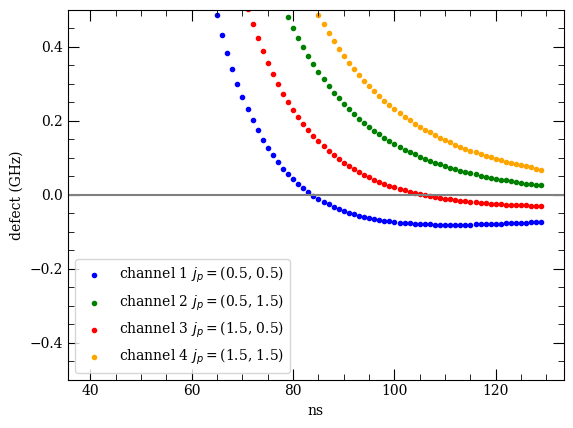

1
channel 1 = |Rb 83s_1/2, Cs 88s_1/2> -> |Rb 83p_0.5, Cs 87p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = 7.061715419933847
n = 83
2
channel 1 = |Rb 84s_1/2, Cs 89s_1/2> -> |Rb 84p_0.5, Cs 88p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = -2.447698837345861
n = 84
3
channel 1 = |Rb 85s_1/2, Cs 90s_1/2> -> |Rb 85p_0.5, Cs 89p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = -11.077855780387434
n = 85
4
channel 2 = |Rb 128s_1/2, Cs 133s_1/2> -> |Rb 128p_0.5, Cs 132p_1.5>
j_pa, j_pb = (0.5, 1.5)
min defect = 26.941418211889623
n = 128
5
channel 3 = |Rb 105s_1/2, Cs 110s_1/2> -> |Rb 105p_1.5, Cs 109p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = 1.9022698662919355
n = 105
6
channel 3 = |Rb 106s_1/2, Cs 111s_1/2> -> |Rb 106p_1.5, Cs 110p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = -1.030229218061385
n = 106
7
channel 3 = |Rb 107s_1/2, Cs 112s_1/2> -> |Rb 107p_1.5, Cs 111p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = -3.746267572547611
n = 107


In [66]:
plt.figure()
plt.scatter(ns,jp_deltas[0], label=f'channel {1} $j_p =$' + str(jps[0]), color = 'blue', marker='.')
plt.scatter(ns,jp_deltas[1], label=f'channel {2} $j_p =$' + str(jps[1]), color = 'green', marker='.')
plt.scatter(ns,jp_deltas[2], label=f'channel {3} $j_p =$' + str(jps[2]), color = 'red', marker='.')
plt.scatter(ns,jp_deltas[3], label=f'channel {4} $j_p =$' + str(jps[3]), color = 'orange', marker='.')

plt.axhline(y=0, color='grey')
plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-0.5,0.5])

plt.show()

relevant_channel = []
w = 1
for i in range(4):
    
    if Rb_decay:
        for j in range(3):
            if assoc_ns[i] + (j-1) < max_n-1:
                defect = jp_deltas[i][jp_deltas[i].index(min_defects[i])+(j-1)]*1e3
            else:
                defect = 31
            if abs(defect) < 30:
                print(w)
                w+=1
                print(f'channel {i+1} = |Rb {assoc_ns[i]+(j-1)}s_1/2, Cs {assoc_ns[i]+(j-1)+cs_dif}s_1/2> -> |Rb {assoc_ns[i]+(j-1)-1}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif+(j-1)}p_{str(jps[i][1])}>')
                print(f'j_pa, j_pb = {jps[i]}')
                print(f'min defect = {defect}')
                print(f'n = {assoc_ns[i]+(j-1)}')
                
                
                relevant_channel.append([assoc_ns[i]+(j-1), assoc_ns[i]+(j-1)+cs_dif, assoc_ns[i]+(j-1)-1, assoc_ns[i]+cs_dif+(j-1), jps[i][0], jps[i][1], i+1, defect])

        # print(f'channel {i+1} = |Rb {assoc_ns[i]}s_1/2, Cs {assoc_ns[i]+cs_dif}s_1/2> -> |Rb {assoc_ns[i]-1}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif}p_{str(jps[i][1])}>')
        # print(f'j_pa, j_pb = {jps[i]}')
        # print(f'min defect = {min_defects[i]*1e3}')
        # if assoc_ns[i] != max_n:
        #     print(f'channel {i+1} = |Rb {assoc_ns[i]+1}s_1/2, Cs {assoc_ns[i]+cs_dif+1}s_1/2> -> |Rb {assoc_ns[i]}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif+1}p_{str(jps[i][1])}>')
        #     print(f'j_pa, j_pb = {jps[i]}')
        #     print(f'min defect = {min_defects[i+1]*1e3}')
        #     print(f'n = {assoc_ns[i+1]}')
    
    else:
        for j in range(3):
            if assoc_ns[i] + (j-1) < max_n-1:
                defect = jp_deltas[i][jp_deltas[i].index(min_defects[i])+(j-1)]*1e3
            else:
                defect = 31
            if abs(defect) < 30:
                print(w)
                w+=1
                print(f'channel {i+1} = |Rb {assoc_ns[i]+(j-1)}s_1/2, Cs {assoc_ns[i]+(j-1)+cs_dif}s_1/2> -> |Rb {assoc_ns[i]+(j-1)}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif-1+(j-1)}p_{str(jps[i][1])}>')
                print(f'j_pa, j_pb = {jps[i]}')
                print(f'min defect = {defect}')
                print(f'n = {assoc_ns[i]+(j-1)}')
                
                relevant_channel.append([assoc_ns[i]+(j-1), assoc_ns[i]+(j-1)+cs_dif, assoc_ns[i]+(j-1), assoc_ns[i]+cs_dif+(j-1)-1, jps[i][0], jps[i][1], i+1, defect])

            
           
           
            # if assoc_ns[i] != max_n-1:
            #     print(f'channel {i+1} = |Rb {assoc_ns[i]+1}s_1/2, Cs {assoc_ns[i]+cs_dif+1}s_1/2> -> |Rb {assoc_ns[i]}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif+1}p_{str(jps[i][1])}>')
            #     print(f'j_pa, j_pb = {jps[i]}')
            #     print(f'min defect = {jp_deltas[i][assoc_ns[i]+1]*1e3}')
            #     print(f'n = {assoc_ns[i]+1}')
            # print(f'channel {i+1} = |Rb {assoc_ns[i]-1}s_1/2, Cs {assoc_ns[i]+cs_dif-1}s_1/2> -> |Rb {assoc_ns[i]-2}p_{jps[i][0]}, Cs {assoc_ns[i]+cs_dif-1}p_{str(jps[i][1])}>')
            # print(f'j_pa, j_pb = {jps[i]}')
            # print(f'n = {assoc_ns[i]-1}')
            # print(f'min defect = {jp_deltas[i][assoc_ns[i]-min_n-1]*1e3}')
        



In [ ]:
epsilon_0 = scipy.constants.epsilon_0
a_0 = scipy.constants.physical_constants['Bohr radius']
e = scipy.constants.e

# C3k coefficients
c3ks = []
w=1
for c in relevant_channel:
    rb_matrix_element_j = arc.Rubidium().getReducedMatrixElementJ(c[0], 0, .5, c[2], 1, c[4])

    cs_matrix_element_j = arc.Caesium().getReducedMatrixElementJ(c[1], 0, .5, c[3], 1, c[5])

    c3k = (a_0[0]*e) **2 / h / (4*np.pi*epsilon_0) * cs_matrix_element_j * rb_matrix_element_j/np.sqrt(2*c[4]+1)/np.sqrt(2*c[5]+1)
    c3ks.append(c3k*1e9)

    print(w)
    w+=1
    print(f'channel {c[6]} = |Rb {c[0]}s_1/2, Cs {c[1]}s_1/2> -> |Rb {c[2]}p_{c[4]}, Cs {c[3]}p_{c[5]}>')
    print(c3k*1e9)


1
channel 1 = |Rb 83s_1/2, Cs 88s_1/2> -> |Rb 83p_0.5, Cs 87p_0.5>
17.37029100326948
2
channel 1 = |Rb 84s_1/2, Cs 89s_1/2> -> |Rb 84p_0.5, Cs 88p_0.5>
18.234964559208933
3
channel 1 = |Rb 85s_1/2, Cs 90s_1/2> -> |Rb 85p_0.5, Cs 89p_0.5>
19.131520388651488
4
channel 2 = |Rb 128s_1/2, Cs 133s_1/2> -> |Rb 128p_0.5, Cs 132p_1.5>
104.82579408558252
5
channel 3 = |Rb 105s_1/2, Cs 110s_1/2> -> |Rb 105p_1.5, Cs 109p_0.5>
44.303429182165466
6
channel 3 = |Rb 106s_1/2, Cs 111s_1/2> -> |Rb 106p_1.5, Cs 110p_0.5>
46.03459420296419
7
channel 3 = |Rb 107s_1/2, Cs 112s_1/2> -> |Rb 107p_1.5, Cs 111p_0.5>
47.815999932634675


This is more in agreemant with literature

In [26]:
print(len(relevant_channel))

7


2
1.1821238873781086
                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.



Diagonalizing interaction matrix...

99% Now we are plotting...


[[61, 1, 0.5, 64, 1, 0.5, np.float64(0.002598861043949826)],
 [61, 0, 0.5, 65, 0, 0.5, np.float64(0.0)]]

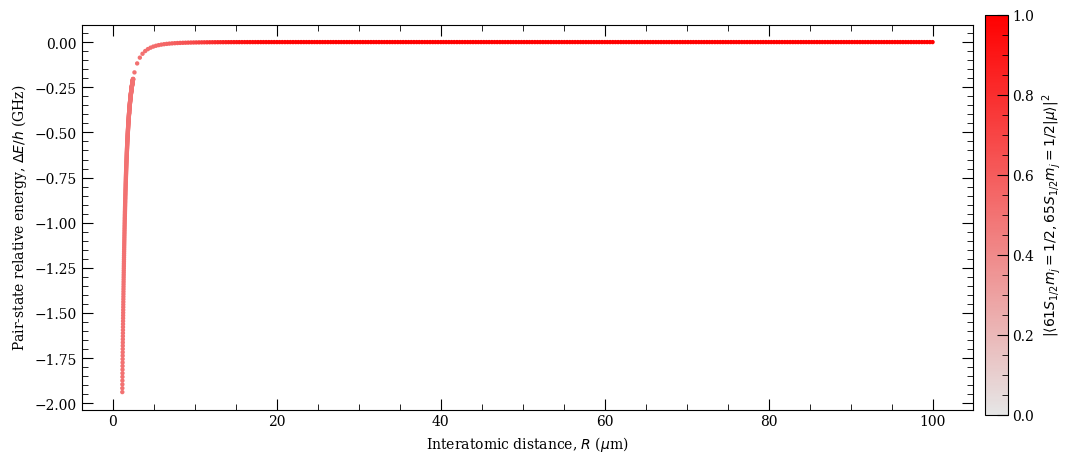

In [31]:

channel = 1

c = relevant_channel[channel-1]
pair = PairStateInteractions(Rubidium(), c[0], 0, 1/2, c[1], 0, 1/2, 1/2, 1/2, interactionsUpTo=2, s2=1/2, atom2=Caesium())

pair.defineBasis(0, 0, 1, 1, 1.1*abs(c[7])*1e6, progressOutput=False)

print(len(pair.basisStates))

rvdw = pair.getLeRoyRadius()

print(rvdw)
r = np.append(np.linspace(rvdw, 2.5, 300), np.linspace(2.01, 100, 300))

nEig = 10
pair.diagonalise(r, nEig, progressOutput=True)

pair.plotLevelDiagram()

pair.channel

Data points to fit =  386
Rvdw =   13.507824979071874  mu m
offset =  9.999999999993164e-09 
 scale =  -3.2013497896783867


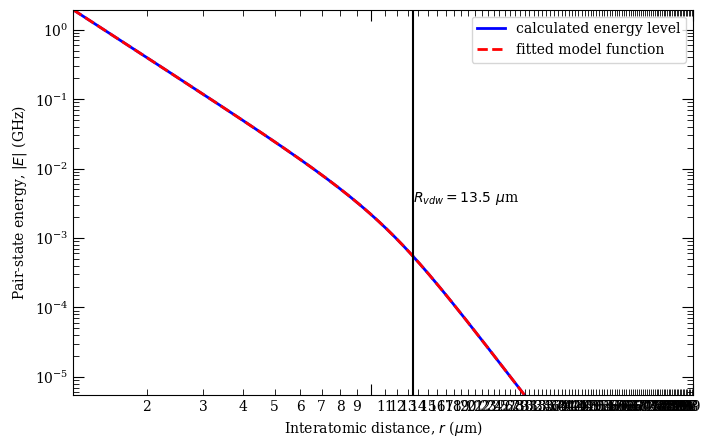

c3 =  3.2022006647031285  GHz /R^3 (mu m)^3
offset =  -0.0012398983974622926


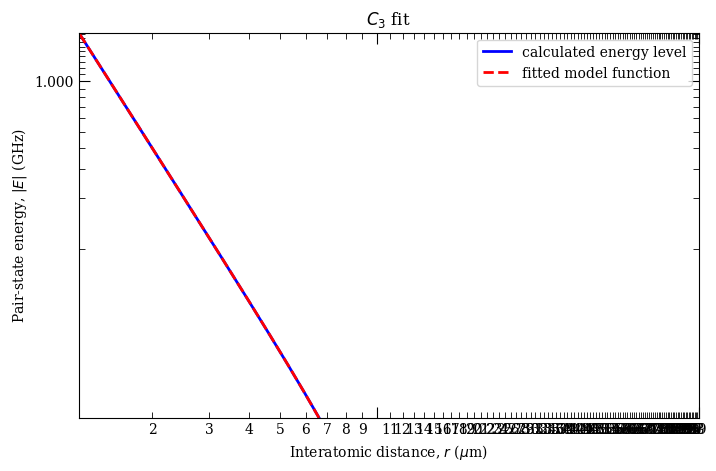

c6 =  3913.3512262556383  GHz /R^6 (mu m)^6
offset =  -1.8096320553925289e-09


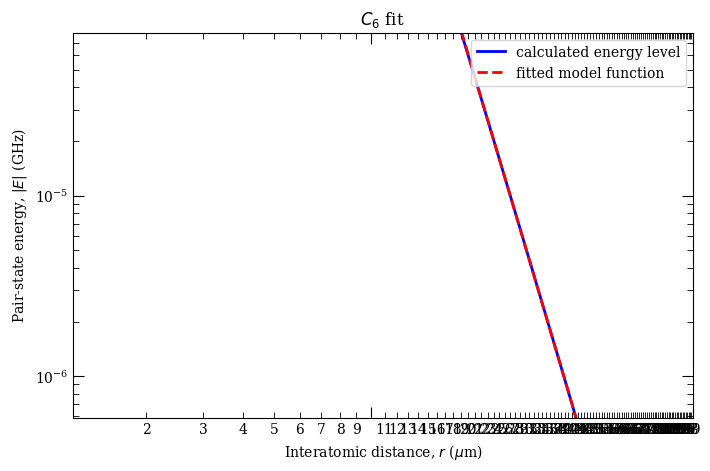

13.507824979071874


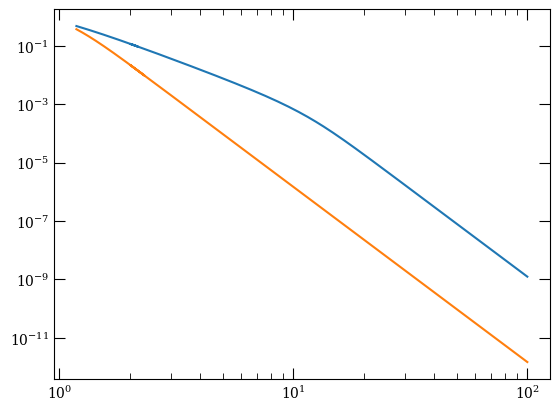

In [32]:


rvdw2 = pair.getVdwFromLevelDiagram(
    .500000, 30.000000, minStateContribution=0.1, showPlot=True
)
c3 = pair.getC3fromLevelDiagram(
    .5, rvdw2 * 0.5, showPlot=True, minStateContribution=0.2
)
c6 = pair.getC6fromLevelDiagram(
    1.4 * rvdw2, rvdw2 + 30.0, showPlot=True, minStateContribution=0.2
)
plt.figure()

print(rvdw2)

A = 1
B = 1
E = [A+B*(1-np.sqrt(1+(rvdw2/rs)**6))/(1-np.sqrt(1+rvdw2**6)) for rs in r]
E2 = [A+B*(1-np.sqrt(1+(rvdw/rs)**6))/(1-np.sqrt(1+rvdw**6)) for rs in r]

plt.loglog(r, np.log(E))
plt.loglog(r, np.log(E2))
plt.yscale('log')
plt.show()

In [29]:
print(c6)
print(c3**2/abs(c[7]))
print(c3)

c3_from_c6 = np.sqrt(c6*abs(c[7])/1e3)
print(c3_from_c6)
print(f'percentage dif = {(c3 - c3_from_c6)/c3*100}')

23251.02034510092
23.491781418459784
14.521239232817392
14.446635415879504
percentage dif = 0.5137565447533311


8.976177034025046


c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\arc\calculations_atom_pairstate.py:4804: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  self.ax.scatter(


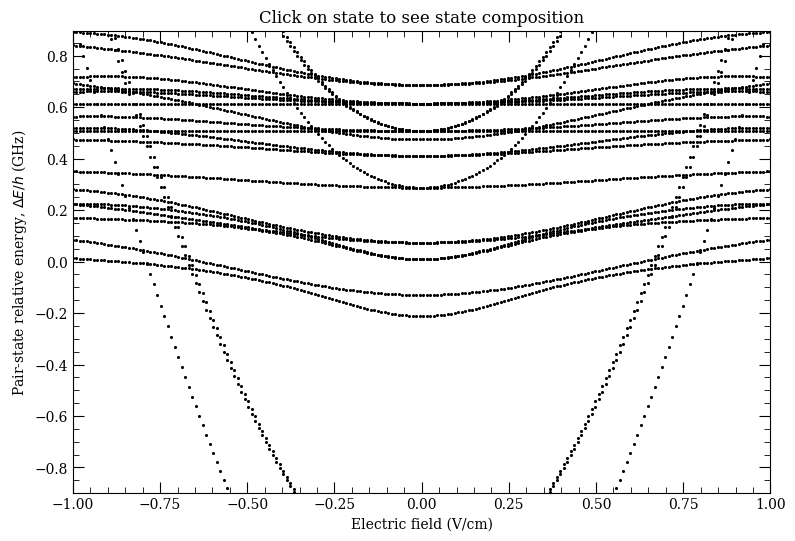

In [30]:
efield = 100
calculation = StarkMapResonances(
    Rubidium(), [c[0], 0, 0.5, 0.5] ,Caesium(), [c[1], 0, 0.5, 0.5])

print(c[7])

calculation.findResonances(
    c[0]-3, c[0]+3, 1, np.linspace(-efield, efield, 200), energyRange=[-1*c[7]*1e8, 1*c[7]*1e8]
)



calculation.showPlot(interactive=True)